#### Observación inicial de los datos

In [21]:
!pip install pandas
import pandas as pd

# Ruta del archivo CSV
file_path = r"C:\Users\shara\OneDrive - Universidad Autónoma Latinoamericana\7mo semestre\Ciencia de datos II\dirty_cafe_sales.csv"

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(file_path)

# Ver las primeras filas del DataFrame
print(df.head())

  Transaction ID    Item Quantity Price Per Unit Total Spent  Payment Method  \
0    TXN_1961373  Coffee        2            2.0         4.0     Credit Card   
1    TXN_4977031    Cake        4            3.0        12.0            Cash   
2    TXN_4271903  Cookie        4            1.0       ERROR     Credit Card   
3    TXN_7034554   Salad        2            5.0        10.0         UNKNOWN   
4    TXN_3160411  Coffee        2            2.0         4.0  Digital Wallet   

   Location Transaction Date  
0  Takeaway       2023-09-08  
1  In-store       2023-05-16  
2  In-store       2023-07-19  
3   UNKNOWN       2023-04-27  
4  In-store       2023-06-11  



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
# Ver información general
print(df.info())

# Descripción estadística de variables numéricas
print(df.describe())

# Identificar valores faltantes
print(df.isnull().sum())

# Ver tipos de datos
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB
None
       Transaction ID   Item Quantity Price Per Unit Total Spent  \
count           10000   9667     9862           9821        9827   
unique          10000     10        7              8          19   
top       TXN_9226047  Juice        5            3.0         6.0   
freq                1   1171     2013           2429         979   

        Payment Method  Location Transaction 

#### Limpieza de datos

In [23]:
print("Información del DataFrame limpio:")
print(df.info())

print("\nValores faltantes por columna:")
print(df.isnull().sum())

Información del DataFrame limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB
None

Valores faltantes por columna:
Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64


In [24]:
import pandas as pd
import numpy as np

# Cargar el dataset
file_path = r"C:\Users\shara\OneDrive - Universidad Autónoma Latinoamericana\7mo semestre\Ciencia de datos II\dirty_cafe_sales.csv"
df = pd.read_csv(file_path)

# Definir valores inválidos
invalid_values = ["ERROR", "UNKNOWN", "None", ""]

# Limpiar cada columna
# 1. Item
df['Item'] = df['Item'].replace(invalid_values, np.nan)
df['Item'].fillna(df['Item'].mode()[0], inplace=True)

# 2. Quantity
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Quantity'].fillna(df['Quantity'].median(), inplace=True)

# 3. Price Per Unit
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Price Per Unit'].fillna(df['Price Per Unit'].mean(), inplace=True)
df['Price Per Unit'] = df['Price Per Unit'].round(2)  # Redondear a 2 decimales

# 4. Payment Method
df['Payment Method'] = df['Payment Method'].replace(invalid_values, np.nan)
df['Payment Method'].fillna(df['Payment Method'].mode()[0], inplace=True)

# 5. Location
df['Location'] = df['Location'].replace(invalid_values, np.nan)
df['Location'].fillna(df['Location'].mode()[0], inplace=True)
print(df.dtypes)
import pandas as pd

# 6. Convertir 'Total Spent' al resultado de Price per Unit*Quantity
df['Total Spent'] = df['Quantity'] * df['Price Per Unit']


# 7. Convertir 'Transaction Date' a fecha, manejando errores
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df = df.dropna(subset=['Transaction Date'])


# Mostrar la información después de los cambios
print(df.info())



# Verificar el resultado
print("Información del DataFrame limpio:")
print(df.info())

print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Exportar el DataFrame limpio a un nuevo archivo CSV 
df.to_csv("clean_cafe_sales.csv", index=False)
print("\nDataFrame limpio exportado a 'clean_cafe_sales.csv'")

Transaction ID       object
Item                 object
Quantity            float64
Price Per Unit      float64
Total Spent          object
Payment Method       object
Location             object
Transaction Date     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 9540 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9540 non-null   object        
 1   Item              9540 non-null   object        
 2   Quantity          9540 non-null   float64       
 3   Price Per Unit    9540 non-null   float64       
 4   Total Spent       9540 non-null   float64       
 5   Payment Method    9540 non-null   object        
 6   Location          9540 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 670.8+ KB
None
Información del DataFrame limpio:
<class 'p

C:\Users\shara\AppData\Local\Temp\ipykernel_8752\3871379536.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item'].fillna(df['Item'].mode()[0], inplace=True)
C:\Users\shara\AppData\Local\Temp\ipykernel_8752\3871379536.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo


DataFrame limpio exportado a 'clean_cafe_sales.csv'


#### EDA


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Figure size 1200x600 with 0 Axes>

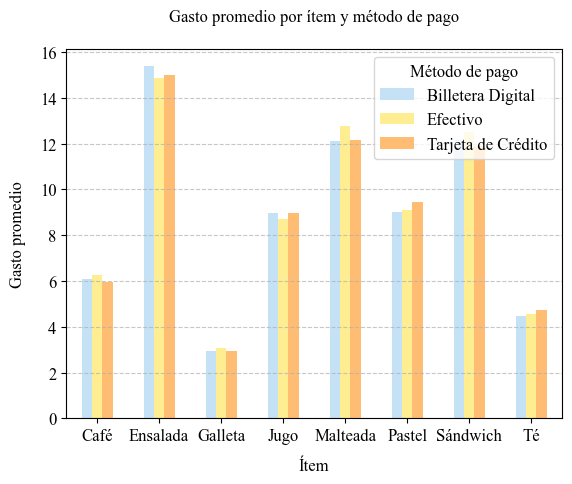

<Figure size 1200x600 with 0 Axes>

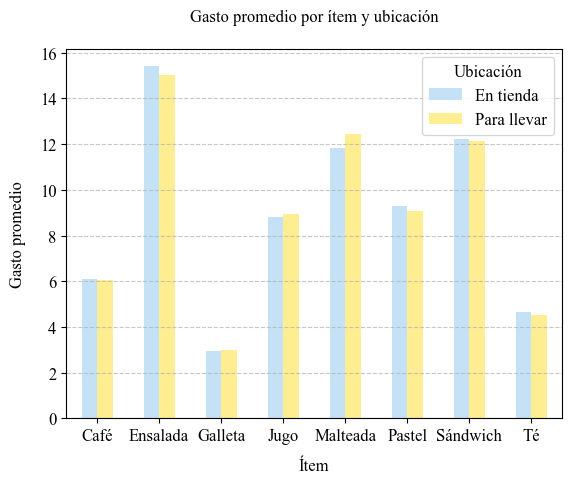

In [26]:
!pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# Configuración de estilo global
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

# Definir colores personalizados
colors = ["#C4E1F6", "#FEEE91", "#FFBD73", "#FF9D3D"]

# Diccionarios de traducción
traduccion_items = {
    "Coffee": "Café",
    "Tea": "Té",
    "Sandwich": "Sándwich",
    "Cake": "Pastel",
    "Juice": "Jugo",
    "Salad":"Ensalada",
    "Smoothie":"Malteada",
    "Cookie":"Galleta"
}

traduccion_metodos_pago = {
    "Credit Card": "Tarjeta de Crédito",
    "Debit Card": "Tarjeta de Débito",
    "Cash": "Efectivo",
    "Mobile Payment": "Pago Móvil",
    "Digital Wallet": "Billetera Digital"
}

traduccion_ubicaciones = {
    "In-store": "En tienda",
    "Takeaway": "Para llevar"
}

# Aplicar las traducciones en el DataFrame
df["Item"] = df["Item"].replace(traduccion_items)
df["Payment Method"] = df["Payment Method"].replace(traduccion_metodos_pago)
df["Location"] = df["Location"].replace(traduccion_ubicaciones)

# Convertir Total Spent a float para evitar errores
df["Total Spent"] = pd.to_numeric(df["Total Spent"], errors="coerce")

# Gráfico 1:
#Gasto promedio por ítem y método de pago
plt.figure(figsize=(12, 6))
df.pivot_table(index="Item", columns="Payment Method", values="Total Spent", aggfunc="mean").plot.bar(color=colors)
plt.title("Gasto promedio por ítem y método de pago", fontsize=12, loc="center", pad=20)
plt.xlabel("Ítem", fontsize=12, loc="center", labelpad=10)
plt.ylabel("Gasto promedio", fontsize=12, loc="center", labelpad=10)
plt.legend(title="Método de pago", fontsize=12, title_fontsize=12, loc="best")
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Gráfico 2: Gasto promedio por ítem y ubicación
plt.figure(figsize=(12, 6))
df.pivot_table(index="Item", columns="Location", values="Total Spent", aggfunc="mean").plot.bar(color=colors)
plt.title("Gasto promedio por ítem y ubicación", fontsize=12, loc="center", pad=20)
plt.xlabel("Ítem", fontsize=12, loc="center", labelpad=10)
plt.ylabel("Gasto promedio", fontsize=12, loc="center", labelpad=10)
plt.legend(title="Ubicación", fontsize=12, title_fontsize=12, loc="best")
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


#### Pipeline de pre-procesamiento

In [27]:
!pip install scikit-learn
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:

# Definir las columnas numéricas y categóricas
num_features = ["Quantity", "Price Per Unit"]
cat_features = ["Item", "Payment Method", "Location"]

# Pipeline para variables numéricas
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # Imputar con la mediana
    ("scaler", StandardScaler())  # Escalar los datos
])

# Pipeline para variables categóricas
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Imputar con la moda
    ("encoder", OneHotEncoder(handle_unknown="ignore"))  # Codificación One-Hot
])

# Combinar ambos pipelines en un ColumnTransformer
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])


In [29]:
# Aplicar el pipeline de preprocesamiento
df_transformed = preprocessor.fit_transform(df)

# Convertimos la salida a DataFrame
df_transformed = pd.DataFrame(df_transformed)

# Ver los primeros resultados
print(df_transformed.head())


         0         1    2    3    4    5    6    7    8    9    10   11   12  \
0 -0.741832 -0.763746  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
1  0.702686  0.040211  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   
2  0.702686 -1.567703  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
3 -0.741832  1.648125  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
4 -0.741832 -0.763746  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

    13   14  
0  0.0  1.0  
1  1.0  0.0  
2  1.0  0.0  
3  0.0  1.0  
4  1.0  0.0  


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

#4. Crear el pipeline con el modelo
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(n_estimators=100, random_state=42))
])

# Eliminar filas donde Total Spent sea NaN antes de definir X e y
df = df.dropna(subset=["Total Spent"])

# Definir X e y
X = df.drop(columns=["Total Spent"])  # Variables predictoras
y = df["Total Spent"]  # Variable objetivo

print("Valores NaN en y:", y.isna().sum())  # Debería imprimir 0



Valores NaN en y: 0


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el pipeline con el modelo de regresión
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Entrenar el modelo con los datos de entrenamiento
full_pipeline.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = full_pipeline.predict(X_test)

# Evaluar el error
mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio (MAE): {mae}")


Error absoluto medio (MAE): 0.2964957207106682
